In [1]:
from datetime import date as dt
import datetime
from datetime import timedelta
import os
import subprocess
import urllib
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import style

# Step #1: Gather Treasury Data

In [2]:
#Dates used for this study
today = '2020-12-31'
beginning = '2011-01-01'

#Create new directory for the study data
if not(os.path.exists('Covid-Study-Data')):
    cmd = 'mkdir ' + os.path.join(os.getcwd(),'Covid-Study-Data')
    print(cmd)
    (status, output) = subprocess.getstatusoutput(cmd)    # try to make a new directory
    print("STATUS:\n", status,"OUTPUT:\n", output)
else:
    print("'{}' already exists".format(os.path.join(os.getcwd(), 'Covid-Study-Data')))

#The Base URL is split into 5 sections
baseurl = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id='
base2 = '&scale=left&cosd='
base3 = '&coed='
base4 = '&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Daily&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date='
base5 = '&revision_date='

#URLs for requests
US10Y = baseurl + 'DGS10' + base2 + beginning + base3 + today + base4 + str(today) + base5 + str(today) + '&nd=1962-01-02'
US10YTIPS = baseurl + 'DFII10'+ base2 + beginning + base3 + today + base4 + str(today) + base5 + str(today) + '&nd=2003-01-02'
US30Y = baseurl + 'DGS30'+ base2 + beginning + base3 + today + base4 + str(today) + base5 + str(today) + '&nd=1977-02-15'
US30YTIPS = baseurl + 'DFII30'+ base2 + beginning + base3 + today + base4 + str(today) + base5 + str(today) + '&nd=2010-02-22'
US1Y = baseurl + 'DGS1'+ base2 + beginning + base3 + today + base4 + str(today) + base5 + str(today) + '&nd=1976-06-01'

datalinks = {'US10Y':US10Y,'US10YTIPS':US10YTIPS,'US30Y':US30Y,'US30YTIPS':US30YTIPS,'US1Y':US1Y}

#Download CSV files for the treasury yield data
for element in datalinks.keys():
    destfile = os.path.join(os.getcwd(), element + '.csv')
    fromfile = datalinks.get(element)
    if not os.path.exists(destfile):
        urllib.request.urlretrieve(fromfile, destfile)
    else:
        print("'{}' already exists".format(destfile))

#Read the treasury CSV files into dataframes
US10Y = pd.read_csv('US10Y.csv').set_index('DATE')
US10YTIPS = pd.read_csv('US10YTIPS.csv').set_index('DATE')
US30Y = pd.read_csv('US30Y.csv').set_index('DATE')
US30YTIPS = pd.read_csv('US30YTIPS.csv').set_index('DATE')
US1Y = pd.read_csv('US1Y.csv').set_index('DATE')

#Concatenate all treasury data
df = pd.concat([US10Y, US10YTIPS,US30Y,US30YTIPS,US1Y],axis=1)
df.columns = ['US10Y', 'US10YTIPS','US30Y','US30YTIPS','US1Y']
df = df[df.US10Y != '.']
df = df[df.US10Y != ''].astype(float)
df.index=pd.to_datetime(df.index)

mkdir /Users/sambaker/Desktop/School/IS/Short Assignments/Covid-Study-Data
STATUS:
 1 OUTPUT:
 mkdir: /Users/sambaker/Desktop/School/IS/Short: File exists
mkdir: Assignments: No such file or directory


# Step #2: Calculations

In [6]:
#New dataframe containing daily changes in yields
daily_changes = df.diff()
daily_changes.groupby(df.index.year)

US30Y_US1Y_Corr = pd.DataFrame(columns = ['US30Y US1Y Correlation'])
for element in list(range(2011,2021,1)):
    US30Y_US1Y_Corr.loc[str(element)] = daily_changes.loc[str(element)]['US30Y'].corr(daily_changes.loc[str(element)]['US1Y'])

US30Y_US1Y_Corr

,US30Y US1Y Correlation
2011,0.217908
2012,0.211714
2013,0.218818
2014,0.215504
2015,0.368142
2016,0.422381
2017,0.427428
2018,0.428130
2019,0.583680
2020,0.384756


# Step #3: Visualization

<AxesSubplot:title={'center':'US30Y and US1Y Treasury Yields'}, xlabel='DATE', ylabel='Percent'>

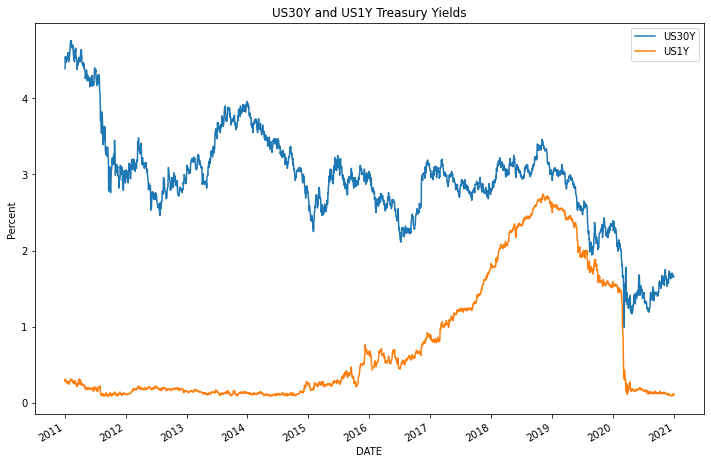

In [4]:
df[['US30Y','US1Y']].plot(figsize = (12,8),title = 'US30Y and US1Y Treasury Yields',ylabel = 'Percent')

<AxesSubplot:title={'center':'Correlation of Daily Yield Changes in US30Y and US1Y Treasuries'}>

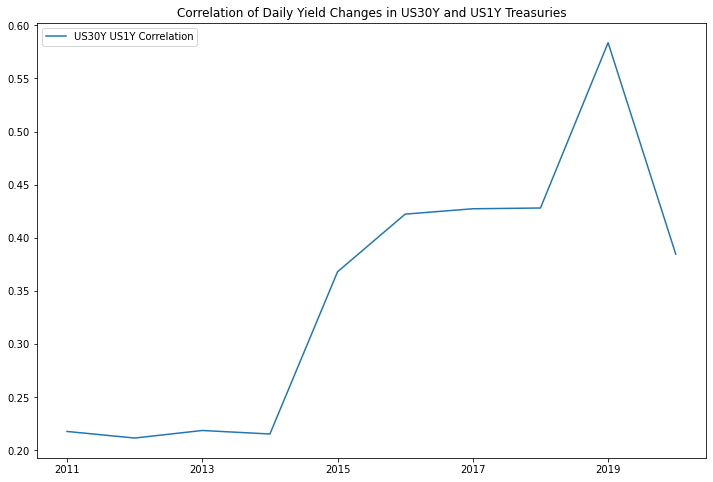

In [5]:
US30Y_US1Y_Corr.plot(figsize = (12,8),title='Correlation of Daily Yield Changes in US30Y and US1Y Treasuries')